<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Pré-traitement" data-toc-modified-id="Pré-traitement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pré-traitement</a></span></li><li><span><a href="#Entraînement-du-modèle" data-toc-modified-id="Entraînement-du-modèle-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Entraînement du modèle</a></span></li><li><span><a href="#Interpréteur-shap" data-toc-modified-id="Interpréteur-shap-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interpréteur shap</a></span><ul class="toc-item"><li><span><a href="#Arbre-d'importance-des-variables" data-toc-modified-id="Arbre-d'importance-des-variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Arbre d'importance des variables</a></span></li><li><span><a href="#Cascade-d'interprétation-de-prédiction" data-toc-modified-id="Cascade-d'interprétation-de-prédiction-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cascade d'interprétation de prédiction</a></span></li></ul></li><li><span><a href="#Limites-et-améliorations" data-toc-modified-id="Limites-et-améliorations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Limites et améliorations</a></span></li></ul></div>

# Introduction

Cette note méthodologique décrit les différentes étapes nécessaires pour obtenir le modèle prédictif, selon les axes suivants : 

* Le prétraitement des données
* La méthodologie d'entraînement du modèle
* La fonction coût, l'algorithme d'optimisation et la métrique d'évaluation
* L’interprétabilité du modèle
* Les limites et les améliorations possibles

# Pré-traitement

Comme tout modèle, le notre nécessite un jeu d'entraînement ainsi que des données sur lesquelles le déployer. 

Nous suggérons d'utiliser les clients ayant actuellement souscrit à un crédit comme jeu d'entraînement et les cliens ayant déposé une demande de crédit.

Le jeu d'entraînement devra être séparé en un sous-jeu d'entraînement (80%) et un sous-jeu de validation (20%).

> Note : En phase de développement, il est nécessaire de séparer le jeu de données en 3 : 
> - Sous-jeu d'entraînement (70% * 80% soit 56% des données)
> - Sous-jeu de validation (70% * 20 % soit 14% des données)
> - Jeu de test (30% des données)


Il faudra ensuite concaténer toutes les données puis procéder au pré-traitement suivant :

- Supprimer les colonnes de la table *application* à savoir: 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
- Supprimer toute autre colonne à plus de 20% de valeurs manquantes
- Supprimer les variables "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"
- Compléter les valeurs manquantes des colonnes relatives à un compte (par exemple "OBS_30_CNT_SOCIAL_CIRCLE") par 0, et celles des variables catégorielles par la catégorie majoritaire du jeu d'entraînement
- Compléter les valeurs manquantes des colonnes numériques par les médianes du jeu d'entraînement
- Eliminer toutes valeurs manquantes restantes du jeu d'entraînement

Ensuite, prendre la table *POS_CASH_BALANCE* , en extraire, pour chaque client ("SK_ID_CURR"), et pour la variable "SK_DPD_DEF" :

- La valeur minimale,
- La valeur maximale
- La valeur médiane
- Fusionner avec le dataset principal et imputer aux valeurs manquantes les valeurs médianes du jeu d'entraînement

Pour la table *Bureau*, appliquer le prétraitement suivant :

- Pour chaque variable numérique de chaque client, extraire le nombre d'observations, la moyenne, le maximum, le minimum, et la somme totale
- Pour chaque variable catégorielle de chaque client, extraire, pour chaque valeur possible de cette variable, le nombre de fois que cette valeur apparaît et la proportion qu'elle occupe parmi l'intégralité des valeurs
- Supprimer les colonnes lacunaires à plus de 20%
- Fusionner avec le dataset principal
- Compléter les valeurs manquantes par des 0

A présent, préparer le dataset pour le modèle :

- Supprimer les variables "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"
- Encoder les variables catégorielles à l'aide d'un One Hot Encoder
- Normaliser les variables numériques à l'aider d'un Standard Scaler
- Faire de la variable "SK_ID_CURR" l'index du dataset

Une fois le prétraitement fini, séparer le dataset global en sous-sets d'entraînement, de validation, et de déploiement.

Sauvegarder le jeu de déploiement sous le nom "preprocessed_testing_set.csv" dans un dossier data. C'est ce nom de chemin que le dashboard viendra chercher pour charger les données. 

# Entraînement du modèle

Le modèle à entraîner sera le XGBoost. 

Sa fonction de coût sera "binary:logistic", le type d'arbre sera "hist", et configurer le poids des réponses positives (scale_pos_weight) en fonction du ratio 0/1 de la variable de réponse du jeu d'entraînement. Prendre l'aire sous la courbe roc ("auc") comme métrique d'évaluation.

Nous suggérons d'entraîner le modèle avec l'hyperparamétreur bayésien HyperOpt, et de commencer par l'espace d'exploration suivant :

In [ ]:
space = {
    'max_depth' : hp.choice('max_depth', range(1, 30, 1)),
    'eta' : hp.quniform('eta', 0, 1, 0.1),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1.0, 0.01),
    'colsample_bynode' : hp.quniform('colsample_bynode', 0.1, 1.0, 0.01),
    'max_delta_step' : hp.choice('max_delta_step', range(0, 11, 1))
}

L'hyperparamétrage devrait converger en moins de 50 itérations, mais nous suggérons de le lancer pour une centaine pour s'assurer d'obtenir la meilleure réponse possible.

Si le modèle optimal renvoyé a une des valeurs maximales pour un des hyperparamètres, relancer l'hyperparamétrage pour ce dernier en étendant l'espace d'exploration.

Une fois le modèle entraîné, le sauvegarder dans le dossier data sous le nom "pickle_xgb_model" au format pickle.

Effectuer des prédictions sur le jeu de validation et trouver le seuil pour lequel le modèle obtient 80% de recall.

> Rappel : En phase de développement, il est nécessaire de séparer le jeu de données en 3 : 
> - Sous-jeu d'entraînement (70% * 80% soit 56% des données)
> - Sous-jeu de validation (70% * 20 % soit 14% des données)
> - Jeu de test (30% des données)
>
> le modèle doit être entraîné sur un sous-jeu d'entraînement. Son seuil de recall doit être déduit dans le sous-jeu de validation et doit ensuite être testé sur le jeu de test.

# Interpréteur shap

## Arbre d'importance des variables

Nous utilisons l'interpréteur shap pour afficher deux types de graphiques. Le premier est l'arbre d'importances des variables :

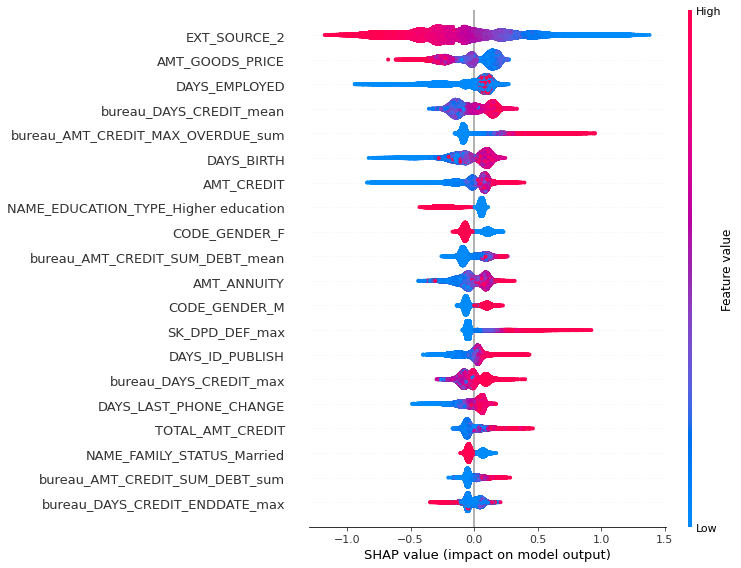

Le graphe montre comment chaque variable influence le score. Par exemple, AMT_GOOD_PRICE :

- Diminue fortement le risque de défaut quand sa valeur est élevée
- Augmente modérément le risque de défaut lorsque la valeur est faible

Le nom des variables peut être de la forme suivante :

- Tel qu'il était dans la table source. Par exemple "EXT_SOURCE_2". Se référer alors au databook
- SK_DPD_DEF_min/max/med : valeurs minimale, maximale ou médiane d'un client pour la variable SK_DPD_DEF de la table POS_CASH
- bureau_/nom_de_variable/_ /statistique/ :  A l'origine, variable numérique de la table bureau. Correspond à une statistique pour cette variable pour un client donné. Statistiques possibles : nombre d'observations (count), la moyenne(mean), le maximum(max), le minimum (min), et la somme totale (sum)
- bureau_/nom_de_variable/_ /nom_de_valeur/_ /statistique/ : A l'origine, variable catégorielle de la table bureau. Correspond à une statistique pour une valeur donnée de cette variable catégorielle. Statistiques possibles :  le nombre de fois que cette valeur apparaît (count) et la proportion qu'elle occupe parmi l'intégralité des valeurs (count_norm)

## Cascade d'interprétation de prédiction

L'autre type de graphe est, pour une prédiction donnée, la cascade expliquant le score obtenu :

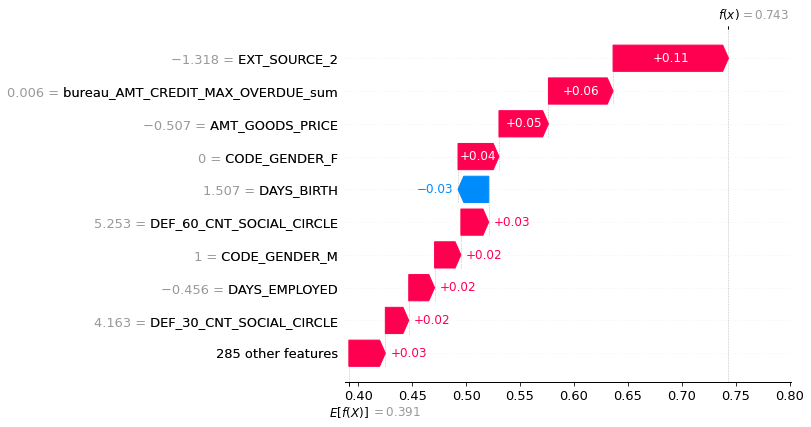

Le graphe se lit de la façon suivante :

- Le client commence avec une valeur de départ correspondant à l'espérance de la prédiction pour le jeu d'entraînement ($E~ [X] = 0.391$ dans cet exemple)
- Chaque variable contribue à l'augmentation où à la diminution du score
- Ces contributions s'additionnent en cascade jusqu'à obtenir le score prédit ($f(x) = 0.743$ dans cet exemple)

Les noms de variables se lisent de la même façon qu'indiquée précédemment

# Limites et améliorations

La principale limite de ce modèle est que nous obtenons un bon recall au prix d'une précision extrêmement faible. Par conséquent, une grande partie des clients se trouveront au dessus du seuil de vigilance. Un entraînement en utilisant la métrique d'aire sous la courbe précision-recall corrige ce problème mais réduit considérablement notre recall, ce qui est contre-productif dans notre cas d'étude.

Il est donc essentiel de considérer ce seuil comme un seuil de vigilance, et non comme un seuil à partir duquel le dossier de crédit doit être refusé. On peut en revanche considérer que l'on refuse les dossier des 5% des scores les plus élevés et d'ajouter une assurance pour les clients au dessus du seuil. Dans un tel cas de figure, nous pourrions alors regarder quelle est la précision obtenue si nous figeons le seuil pour que seuls les 5% des scores les plus élevés soient détectés (que nous appellerions précision@5).

Si l'on considère ce modèle comme une preuve de concept, une amélioration à plus long terme serait d'intégrer toutes les tables à l'aide d'un feature engineering plus poussé, et d'explorer plus profondément la méthode prometteuse du réseau de neurones en ajoutant une couche d'embedding dans le cube de données temporelles. 

De plus, il serait intéressant de ne conserver que les couches d'embedding et de LSTM, d'effectuer une feature extraction que l'on insère dans un XGBoost qui saurait peut-être mieux extrapoler les données.